In [127]:
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
import numpy as np
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import roc_curve, classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay


In [118]:
white_wine = pd.read_csv("winequality-white.csv", sep =';')             # white_wine = ww
wine = white_wine.copy()
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [55]:
white_wine['quality'].replace([1,2,3,4,5],[0,0,0,0,0], inplace=True)
white_wine['quality'].replace([6,7,8,9],[1,1,1,1], inplace = True)
# white_wine['goodquality'] = [1 if x >= 7 else 0 for x in white_wine['quality']]

white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [81]:
x = white_wine.drop(['quality'], axis=1)
y = white_wine.iloc[:,-1]
# y = white_wine["goodquality"]


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)

st_x= StandardScaler()    
x_train_scaler = st_x.fit_transform(x_train)   
x_test_scaler = st_x.fit_transform(x_test)

x_train_scaler = pd.DataFrame(x_train_scaler,columns=white_wine.columns[:-1])
x_train_scaler.head()

x_test_scaler = pd.DataFrame(x_test_scaler,columns=white_wine.columns[:-1])
x_test_scaler.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.537024,-0.561761,0.363351,0.518615,-0.099918,-0.058221,-0.266340,-0.270217,-1.448689,-1.677924,0.416382
1,0.825603,-0.461336,2.816281,0.901457,0.032705,0.061269,-0.123593,1.265831,-1.307970,-0.957185,-1.369474
2,-0.041523,0.743754,0.853937,-0.005274,0.430573,-0.297201,0.542561,0.386156,-0.252576,-0.416631,-0.801247
3,1.568855,-0.360912,-0.045471,0.740261,0.076912,0.598975,0.066737,1.062829,-0.111857,-0.056262,-0.151845
4,0.825603,-0.360912,-0.209000,1.324599,0.165328,-0.595927,0.994594,1.617702,-0.885812,0.394200,-1.125948


 ### NO SCALER

In [92]:
# x_train, y_train

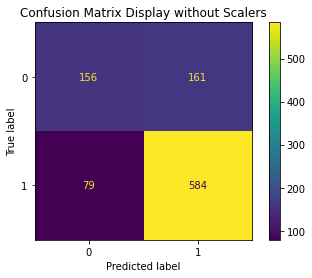

{'Accuracy': 0.7551020408163265, 'Balanced_accuracy': 0.6864791051096488, 'Precision': 0.7838926174496644, 'Sensitivity_recall': 0.8808446455505279, 'F1_score': 0.8295454545454545}


In [93]:

clf = SVC(kernel="linear",C=1)  
clf.fit(x_train, y_train) 
y_pred= clf.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion Matrix Display without Scalers')
plt.show()
# print(classification_report(y_test, y_pred))


Accuracy = metrics.accuracy_score(y_test, y_pred)
Balanced_accuracy = metrics.balanced_accuracy_score(y_test, y_pred)
Precision = metrics.precision_score(y_test, y_pred)
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
F1_score = metrics.f1_score(y_test, y_pred)

print({"Accuracy":Accuracy,"Balanced_accuracy":Balanced_accuracy, "Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"F1_score":F1_score})
# Accuracy, Balanced_accuracy, Precision, Sensitivity_recall, F1_score

,model,accuracy,Precision,F1_score
1,No scaler,0.755102,0.783893,0.829545


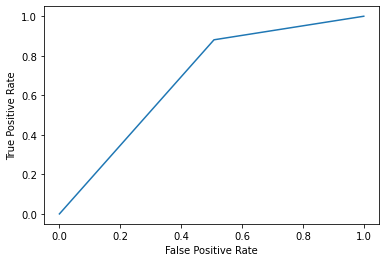

In [94]:
fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
# log = pd.DataFrame(columns="model": "No scaler", "accuracy": Accuracy, "Precision": Precision , "F1_score": F1_score})
d1 = {"model": "No scaler", "accuracy": Accuracy, "Precision": Precision , "F1_score": F1_score}
df1 = pd.DataFrame(d1, index ={1})
df1

### SCALER - Standard Scaler

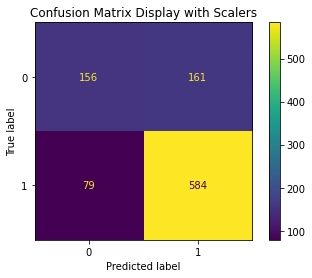

{'Accuracy': 0.7520408163265306, 'Balanced_accuracy': 0.6858629401772842, 'Precision': 0.7845528455284553, 'Sensitivity_recall': 0.8733031674208145, 'F1_score': 0.8265524625267665}


In [97]:
clf = SVC(kernel="linear",random_state=0, C=1)  
clf.fit(x_train_scaler, y_train) 
y_predict = clf.predict(x_test_scaler)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion Matrix Display with Scalers')
plt.show()

# print(classification_report(y_test, y_pred))

Accuracy = metrics.accuracy_score(y_test, y_predict)
Balanced_accuracy = metrics.balanced_accuracy_score(y_test, y_predict)
Precision = metrics.precision_score(y_test, y_predict)
Sensitivity_recall = metrics.recall_score(y_test, y_predict)
F1_score = metrics.f1_score(y_test, y_predict)

print({"Accuracy":Accuracy,"Balanced_accuracy":Balanced_accuracy, "Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"F1_score":F1_score})

,model,accuracy,Precision,F1_score
1,No scaler,0.755102,0.783893,0.829545
2,Scaler,0.752041,0.784553,0.826552


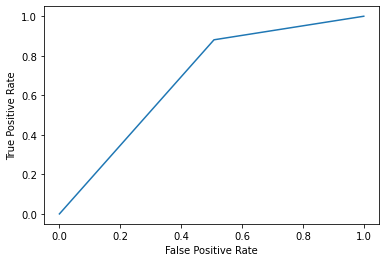

In [98]:
fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
d2 = {"model": "Scaler", "accuracy": Accuracy, "Precision": Precision , "F1_score": F1_score}
df2 = pd.DataFrame(d2, index ={2})
df3 = pd.concat([df1, df2], axis=0)
df3

In [133]:
for i in range(3,9):
    df4 = wine.loc[wine.quality == i and wi]
    x = df4.drop(['quality'], axis=1)
    y = df4.iloc[:,-1]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)

    st_x= StandardScaler()    
    x_train_scaler = st_x.fit_transform(x_train)   
    x_test_scaler = st_x.fit_transform(x_test)

    x_train_scaler = pd.DataFrame(x_train_scaler,columns=white_wine.columns[:-1])
    x_train_scaler.head()

    x_test_scaler = pd.DataFrame(x_test_scaler,columns=white_wine.columns[:-1])
    x_test_scaler.head()
    
    clf = SVC(kernel="linear",random_state=0, C=1)  
    clf.fit(x_train_scaler, y_train)


ValueError: The number of classes has to be greater than one; got 1 class